In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

mit_train_path = r"/content/drive/MyDrive/B3/Machine Learning in Medicine/Practice_1/data/mitbih_train.csv"
mit_test_path = r"/content/drive/MyDrive/B3/Machine Learning in Medicine/Practice_1/data/mitbih_test.csv"
abnormal_path = r"/content/drive/MyDrive/B3/Machine Learning in Medicine/Practice_1/data/ptbdb_abnormal.csv"
normal_path = r"/content/drive/MyDrive/B3/Machine Learning in Medicine/Practice_1/data/ptbdb_normal.csv"

# Load the data
mit_train_df = pd.read_csv(mit_train_path, header=None)
mit_test_df = pd.read_csv(mit_test_path, header=None)

mit_train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
mit_test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


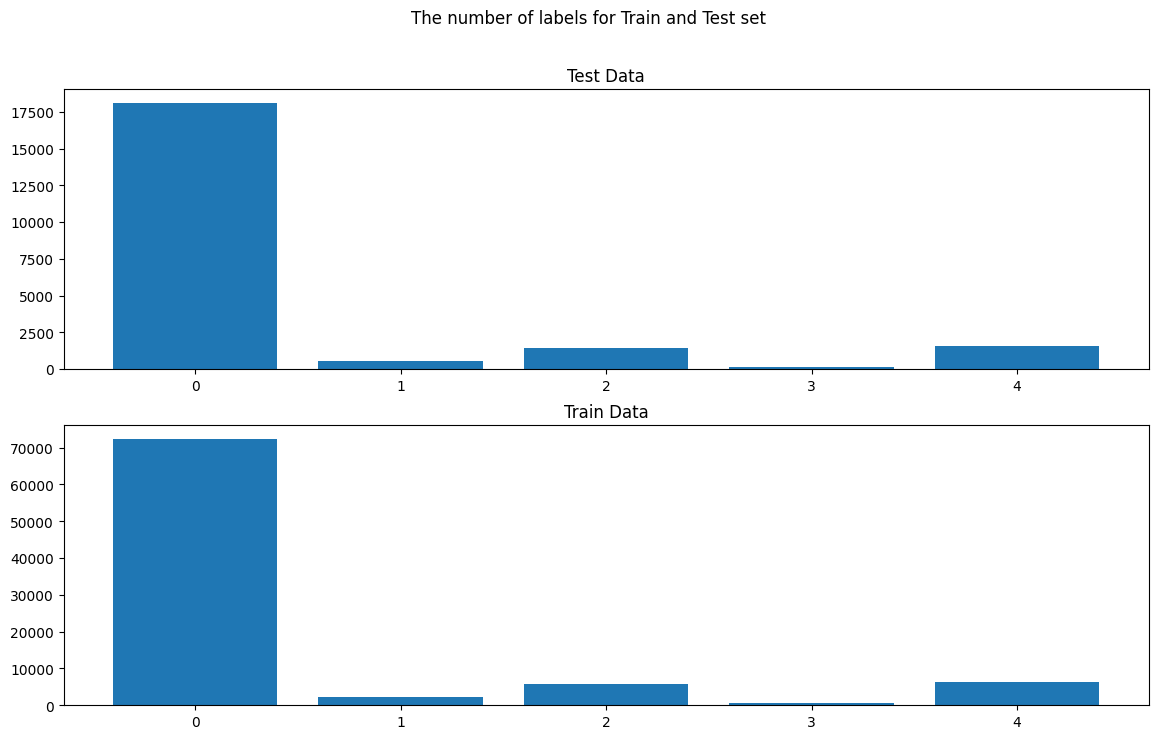

In [ ]:
import matplotlib.pyplot as plt

# Count number of each label for test
test_label_count = mit_test_df[187].value_counts()
train_label_count = mit_train_df[187].value_counts()

fig, ax = plt.subplots(2, figsize=(14, 8))
fig.subplots_adjust(wspace=15)

ax[0].bar(test_label_count.index, test_label_count.values)
ax[0].set_title("Test Data")
ax[1].bar(train_label_count.index, train_label_count.values)
ax[1].set_title("Train Data")

plt.suptitle("The number of labels for Train and Test set")

plt.show()


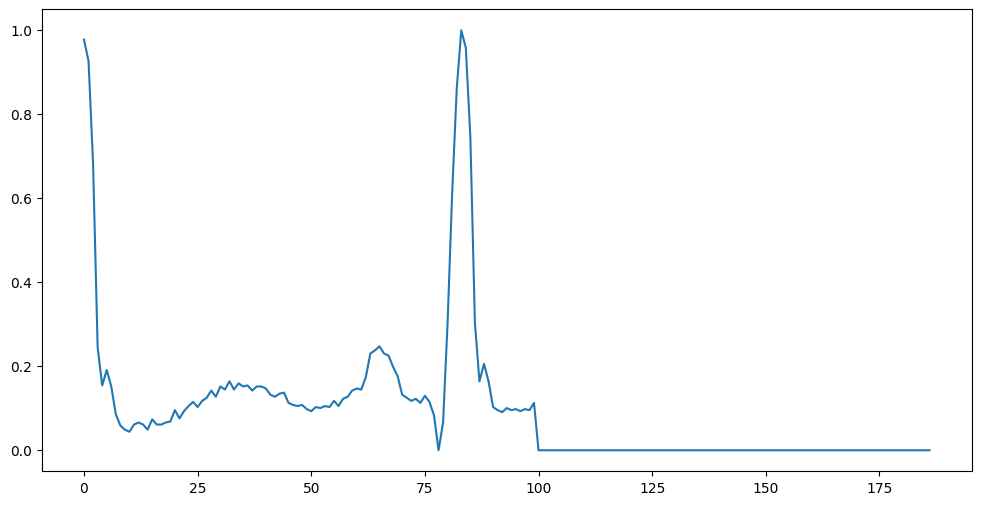

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_ecg = mit_train_df.iloc[0,:-1]
plt.plot(plot_ecg)
plt.show()

<Axes: >

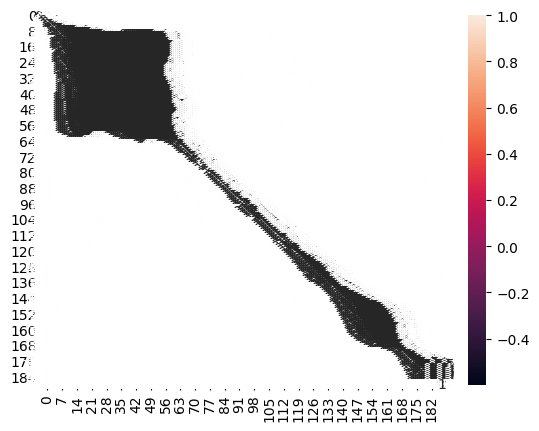

In [ ]:
# Correlation heatmap
import seaborn as sb
import matplotlib.pyplot as plt

sb.heatmap(mit_train_df.corr(), annot=True)
plt.show()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class MIT_BIH_Dataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx, :-1].values
        label = int(self.data.iloc[idx, -1])

        if self.transform:
            sample = self.transform(sample)

        return torch.tensor(sample, dtype=torch.float32), torch.tensor(label, dtype=torch.uint8)

class ClassfierModel(torch.nn.Module):
    def __init__(self, n_class = 5):
        super(ClassfierModel, self).__init__()

        self.conv1 = torch.nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5)

        self.conv2 = torch.nn.Conv1d(in_channels=16, out_channels=16, kernel_size=5)
        self.pool1 = torch.nn.MaxPool1d(kernel_size=2)
        self.drop1 = torch.nn.Dropout(p=0.2)

        self.conv3 = torch.nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5)
        self.conv4 = torch.nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5)
        self.conv5 = torch.nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5)
        self.pool2 = torch.nn.MaxPool1d(kernel_size=2)
        self.drop2 = torch.nn.Dropout(p=0.2)

        self.activation = torch.nn.ReLU()

        self.fc1 = torch.nn.Linear(12*208, 32)
        self.fc2 = torch.nn.Linear(32, n_class)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)

        x = self.activation(self.conv2(x))
        x = self.activation(self.conv3(x))
        x = self.pool1(x)
        x = self.drop1(x)

        x = self.activation(self.conv4(x))
        x = self.activation(self.conv5(x))
        x = self.pool2(x)
        x = self.drop2(x)

        x = x.view(x.size(0), -1)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)

        return x


batch_size = 32

train_loader = DataLoader(MIT_BIH_Dataset(mit_train_df), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(MIT_BIH_Dataset(mit_test_df), batch_size=batch_size, shuffle=False)

# iter data
sample, label = next(iter(train_loader))
print(sample.shape, label.shape)

torch.Size([32, 187]) torch.Size([32])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = ClassfierModel()
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.

    for i,data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs.unsqueeze(1).to(device))

        loss = criterion(outputs.to(device), labels.to(device))

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        losses.append(loss)

    print(f"Epoch {epoch+1}/{num_epochs}, loss: {loss.item()}")

Epoch 1/5, loss: 0.9048325419425964
Epoch 2/5, loss: 0.9048325419425964
Epoch 3/5, loss: 1.4048326015472412
Epoch 4/5, loss: 0.9048325419425964
Epoch 5/5, loss: 1.4048326015472412


Accuracy: 0.8276082587246483


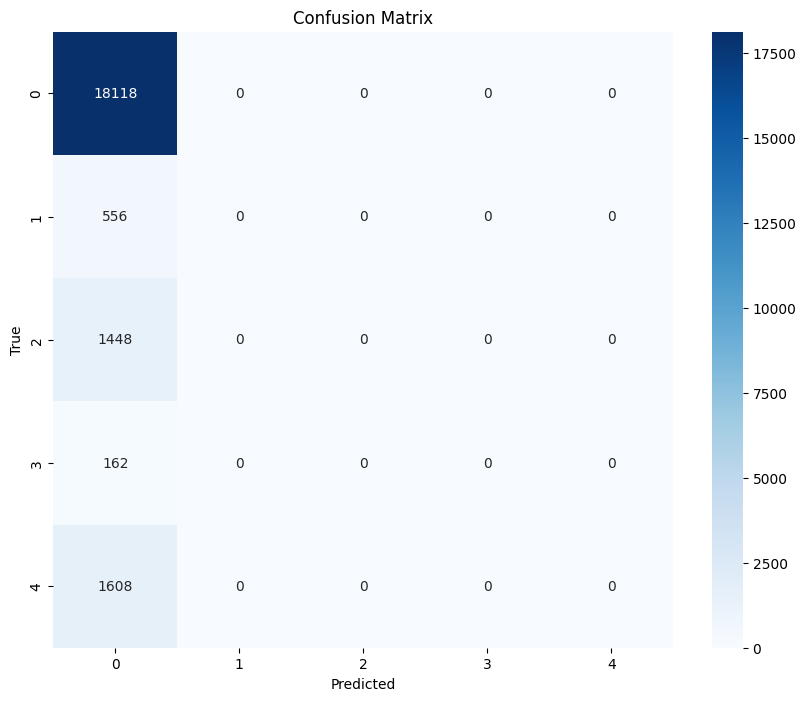

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs.unsqueeze(1).to(device))

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.to(device) == labels.to(device)).sum().item()

        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

    print(f"Accuracy: {correct/total}")
    cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()